In [3]:
%load_ext autoreload
%autoreload 3

In [2]:
from minitorch.tensor.value import Value
from graphviz import Digraph

In [10]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular node for it
        dot.node(name=uid, label= "{  %s | data %.4f | %.4f}" % (n.label,n.data, n.grad), shape="record")
        if n.op:
            dot.node(name=uid + n.op, label=n.op)
            dot.edge(uid + n.op, uid)
    for parent, child in edges:
        dot.edge(str(id(parent)), str(id(child)) + child.op)
    return dot
    

In [18]:
# Try a Neural Network #######
## y = xW + B ##

x1 = Value(data=2, label='x1')
w1 = Value(data=1, label='W1')
b1 = Value(data=1, label='b1')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x1w1.op = '*'
x1w1._prev = (x1, w1)

y1 = x1w1 + b1
y1.label = 'y1'
y1.op = '+'
y1._prev = (x1w1, b1)
y1.label

x2 = Value(data=3, label='x2')
w2 = Value(data=1, label='W2')
b2 = Value(data=2, label='b2')
x2w2 = x2 * w2
x2w2.label = 'x2w2'
x2w2.op = '*'
x2w2._prev = (x2, w2)
y2 = x2w2 + b2
y2.label = 'y2'
y2.op = '+'
y2._prev = (x2w2, b2)
y2.label

y = y1 + y2
y.label = 'y'
y.op = '+'
y._prev = (y1,y2)
y.backward()

k = y / y1


TypeError: unsupported operand type(s) for /: 'Value' and 'Value'

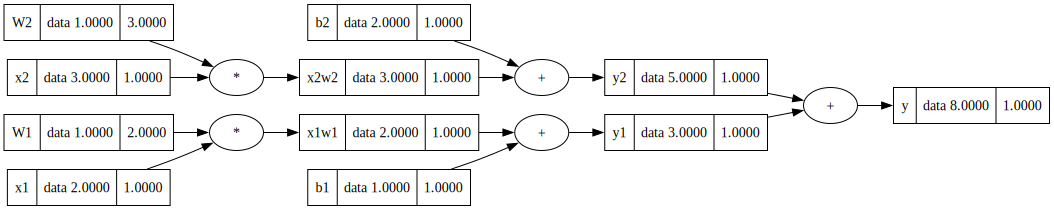

In [15]:
draw_dot(y)

In [17]:
w1.grad

2.0